# GAN for generating digits from MNIST dataset

tutorial source: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
from keras.datasets.mnist import load_data

(X_train,y_train),(X_test,y_test) = load_data()

print("train shape:",X_train.shape)
print("test shape:",X_test.shape)

Using TensorFlow backend.


train shape: (60000, 28, 28)
test shape: (10000, 28, 28)


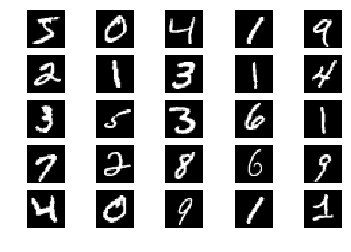

In [3]:
for i in range(25):
    plt.subplot(5,5, 1+i)
    plt.axis("off")
    
    plt.imshow(X_train[i],cmap='gray')

## Building our discriminator model

The second step here is to develop our discriminator model. We will build a realtively small convolutional neural network. we dont include any pooling layers here due to the stride that we set. this stride is enough to effectively downsample our image at each pass. from 28,28 to 14,14 down to 7,7. for more info on this check out the link for a more in depth explanation of padding and strides in convolutions: https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten 
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.optimizers import Adam


def make_discriminator(input_shape =(28,28,1)):
    
    model = Sequential()
    
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=input_shape ))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid')) #output is one because we care about real/fake ex, not the number itself
    
    #compile the model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer = opt, metrics =['accuracy'])
    
    return model



## Data preprocessing and fake sample generation

Before we can begin to train the model, we need to make some slight modofications to our data before we can pass it into the discriminator model. First of all, we need to make the data into a 3D format. Usually with images we woud have the 3 color channels. in our case since we only have one color channel our data is currently in the form of 2 dimensions. We need to reshape it slighly.

Next, we need to normalize our data. the pixel scale goes up to 255 so we simply divide by this max value in order to have a smaller range for the network weights to converge. if we didnt do this step, the model could take a really long time to converge or it may simply fail to do so.

In [5]:
def prep_data():
    # only care about the training dataset, we use palceholders for the other variables
    (X,_),(_,_) = load_data()
    
    
    print(X.shape)
    #upscale our data to 3D
    X = np.expand_dims(X,axis=-1)
    print(X.shape)
    
    X = X.astype('float32') # cast from int to float before normalization
    X /= 255.0 # normalize
    
    return X
    
real_data = prep_data()

(60000, 28, 28)
(60000, 28, 28, 1)


In [0]:
def generate_real_samples(data,n_samples):
    """ samples from train dataset at random
    """
    
    indexes = np.random.randint(0,data.shape[0],n_samples)
    
    samples = data[indexes]
    #add data label
    labels = np.ones((n_samples,1))
    
    return samples,labels


def generate_fake_samples(n_samples):
    
    #generate some noise
    fake_data = np.random.rand(n_samples * 28 * 28)
    
    fake_data = fake_data.reshape((n_samples,28,28,1)) #reshape to 3D matrix
    fake_labels = np.zeros((n_samples,1)) # add labels to data
    
    return fake_data,fake_labels

In [7]:
def train_discriminator(discriminator,data,n_epochs=100, batch_size=256):
    
    half_batch = int(batch_size/2)
    
    for i in range(n_epochs):
        #get some real and fake data
        x_real_batch,y_real_batch = generate_real_samples(data,half_batch)
        x_fake_batch,y_fake_batch = generate_fake_samples(half_batch)
        
        #train model on both examples
        toto,real_acc = discriminator.train_on_batch(x_real_batch,y_real_batch)
        toto2,fake_acc= discriminator.train_on_batch(x_fake_batch,y_fake_batch)
        
        print(toto,toto2)
        print("real accuracy:",real_acc)
        print("fake accuracy:",fake_acc)
        
disc_model = make_discriminator()
train_discriminator(disc_model,real_data)
        

W0803 14:31:57.568082 140520980412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0803 14:31:57.585442 140520980412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0803 14:31:57.588215 140520980412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0803 14:31:57.604362 140520980412288 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0803 14:31:57.613404 

0.6872167 0.7351636
real accuracy: 0.5625
fake accuracy: 0.2265625
0.67806345 0.7111352
real accuracy: 0.6875
fake accuracy: 0.359375
0.6729786 0.6892053
real accuracy: 0.71875
fake accuracy: 0.5078125
0.6711968 0.6636951
real accuracy: 0.7734375
fake accuracy: 0.78125
0.6698617 0.6317404
real accuracy: 0.71875
fake accuracy: 0.8828125
0.6740322 0.60701036
real accuracy: 0.671875
fake accuracy: 0.953125
0.67152786 0.5856986
real accuracy: 0.6953125
fake accuracy: 0.96875
0.6636257 0.5681695
real accuracy: 0.828125
fake accuracy: 1.0
0.6662552 0.5298065
real accuracy: 0.7578125
fake accuracy: 1.0
0.66472596 0.4960464
real accuracy: 0.7890625
fake accuracy: 1.0
0.6586058 0.46786207
real accuracy: 0.84375
fake accuracy: 1.0
0.6498905 0.43601295
real accuracy: 0.875
fake accuracy: 1.0
0.6484415 0.4104225
real accuracy: 0.8359375
fake accuracy: 1.0
0.6488079 0.38398322
real accuracy: 0.8125
fake accuracy: 1.0
0.63884854 0.3565629
real accuracy: 0.859375
fake accuracy: 1.0
0.62963057 0.31787

## Building the Generator Model

The generator will be responsible for creating images realistic enough to fool the discriminator. It will sample data from a latent space and reconstruct it to the distribution of the data that we are trying to aproximate (mnist digits). The latent space is an arbitrarily defined vector space of Gaussian distributed values. Our Generator will associate points from this space to an image of a known dimension. During training, the generator will slowly build up its representation of the data distribution onto the latent space. This will give it a compressed representation of the data so that points relatively close in the latent space will correspond to similar looking digits in our example. 

Inputs: Point in latent space, e.g. a 100 element vector of Gaussian random numbers.
Outputs: Two-dimensional square grayscale image of 28×28 pixels with pixel values in [0,1].

Now we have to build a generator model that will transform the data contained in our latent vector into the final distribution of 28*28 (784 dimensions/pixels with a value between 0 and 1. We could go about this in a few ways but we will use a combination of dense fully connected layers and convolutional layers.
The first dense layer will convert our latent vector into a slightly bigger vector that we can then feed into convolution layers, namely feature maps.

In our example our fully connected layer will output a vector of 128*7*7 for a total of 128 7X7 feature maps or filters. This give enough "space" for the generator to learn a varied amount of stuff to invent, create and generate.

Next, we need a way to go from this low dimensional 7X7 data back up to our original 28X28 image resolution. One way to do this would be by using a UpSampling2D layer ( a sort of reverse pooling layer) followed by a standard 2D Conv layer. There is another layer which combines these two operations called the Conv2DTranspose layer. 

We configure the Conv2DTranspose layer with a stride of 2X2 which will quadruple the size of our input feature maps (double the width and height) It is also a good practice to use a kernel size that is a factor of the stride in order to avoid checkerboard artifacts. (https://distill.pub/2016/deconv-checkerboard/)


In [0]:
from keras.layers import Conv2DTranspose
from keras.layers import Reshape

def make_generator(latent_dim=100):
    
    
    model = Sequential()
    
    #foundation for our first feature maps
    n_nodes = 128*7*7
    
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((7,7,128)))
    
    #upsample to 14x14
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    
    #upsample to 28x28
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
    
    return model

 
gen_model = make_generator()

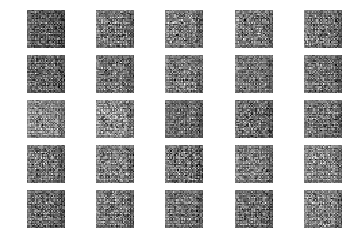

In [9]:
def generate_latent_points(num_samples,latent_dim=100):
    """ generates sample poitns from the latent space
    """
    latent_points = np.random.randn(num_samples * latent_dim)
    latent_points = latent_points.reshape((num_samples,latent_dim))
    
    return latent_points

def generate_from_generator(generator,n_samples,latent_dim=100):
    
    latent_points = generate_latent_points(n_samples,latent_dim)
    
    X = generator.predict(latent_points)
    y = np.zeros((n_samples,1))
    
    return X,y


def generate_from_generator_fixed(generator,n_samples,latent_points,latent_dim=100):
    
    
    X = generator.predict(latent_points)
    
    return X



samples =25

fake_ims,_ = generate_from_generator(gen_model,samples)

for i in range(samples):
    
    plt.subplot(5,5,i+1)
    plt.axis("off")
    
    plt.imshow(fake_ims[i, : , :, 0], cmap="gray" )
plt.show()
    

## Training the Generator model

this training sequence is basically the same as the other GAN examples, either look on the site for an explanation or refer to the first gan tutorial followed.

In [10]:
from keras.optimizers import Adam

def make_gan(discriminator,generator):
    
    discriminator.trainable = False
    
    model = Sequential()
    
    model.add(generator)
    model.add(discriminator)
    
    optimizer = Adam(lr=0.0002, beta_1 = 0.5)
    model.compile(loss="binary_crossentropy", optimizer= optimizer)
    
    return model

dataset = prep_data()

generator = make_generator()
discriminator = make_discriminator()

gan_model = make_gan(discriminator, generator)

(60000, 28, 28)
(60000, 28, 28, 1)


In [11]:
def train(disc,gen,gan,data,latent_dim=100,n_epochs = 50, batch_size = 256):
    
    n_batches = int(data.shape[0] / batch_size)
    print("batches per epoch:",n_batches)
    half_batch = int(batch_size/2) 
    
    #storing the metrics
    gan_loss = []
    disc_loss = []
    
    #latent points for seeing improvement of generator over time
    n_images = 10
    fix_latent_points = generate_latent_points(n_images,latent_dim)
    progress_images = [] #will store images generated from the same latent point after each epoch
    
    for epoch in range(n_epochs):
        print('starting epoch:',epoch)
        for batch_num in range(n_batches):
            #train the discriminator
            X_real,y_real = generate_real_samples(data,half_batch)
            
            X_fake,y_fake = generate_from_generator(gen,half_batch)
            
            #combine data into a single real/fake stack
            X,y = np.vstack((X_real,X_fake)) , np.vstack((y_real, y_fake))
            
            #train discriminator
            d_loss, _ = disc.train_on_batch(X,y)
            disc_loss.append(d_loss)
            
            #train the gan model itself to improve the generator
            latent_points = generate_latent_points(batch_size,latent_dim)
            gan_labels = np.ones((batch_size,1))
            
            g_loss = gan.train_on_batch(latent_points,gan_labels)
            gan_loss.append(g_loss)
            
            #print("disc loss:",d_loss)
            #print("gan loss:",g_loss)
            
            if batch_num % 10 == 0:
                #generate some images to check gan progress
                imgs = gen.predict(fix_latent_points)
                progress_images.append(imgs)

        
    return gan_loss,disc_loss,progress_images



gan_loss,disc_loss,progress_images = train(discriminator,generator,gan_model,dataset)

            
            

batches per epoch: 234
starting epoch: 0


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


starting epoch: 1
starting epoch: 2
starting epoch: 3
starting epoch: 4
starting epoch: 5
starting epoch: 6
starting epoch: 7
starting epoch: 8
starting epoch: 9
starting epoch: 10
starting epoch: 11
starting epoch: 12
starting epoch: 13
starting epoch: 14
starting epoch: 15
starting epoch: 16
starting epoch: 17
starting epoch: 18
starting epoch: 19
starting epoch: 20
starting epoch: 21
starting epoch: 22
starting epoch: 23
starting epoch: 24
starting epoch: 25
starting epoch: 26
starting epoch: 27
starting epoch: 28
starting epoch: 29
starting epoch: 30
starting epoch: 31
starting epoch: 32
starting epoch: 33
starting epoch: 34
starting epoch: 35
starting epoch: 36
starting epoch: 37
starting epoch: 38
starting epoch: 39
starting epoch: 40
starting epoch: 41
starting epoch: 42
starting epoch: 43
starting epoch: 44
starting epoch: 45
starting epoch: 46
starting epoch: 47
starting epoch: 48
starting epoch: 49


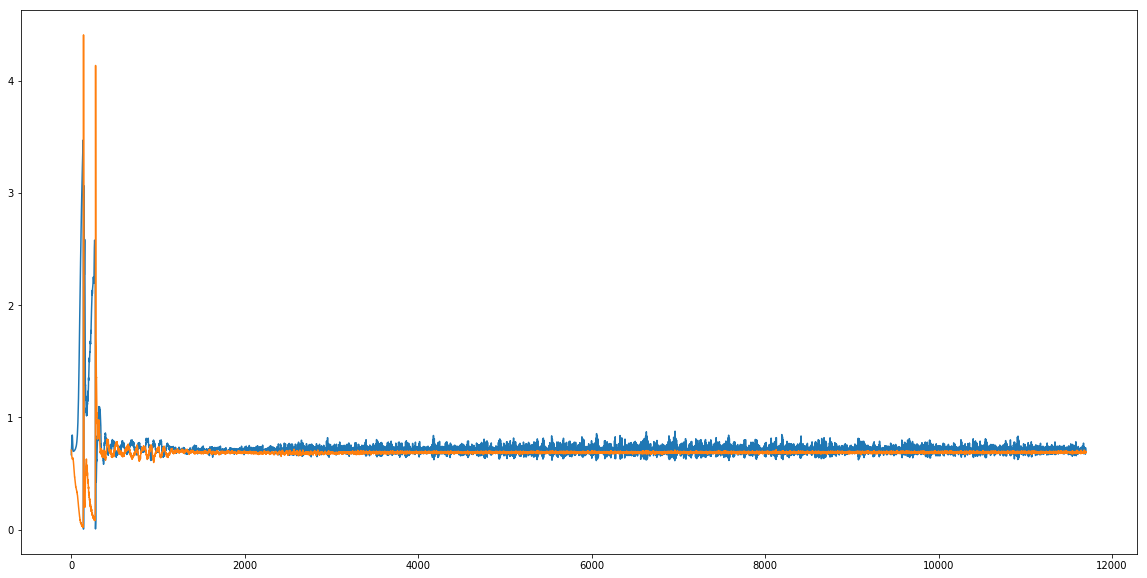

In [12]:
plt.figure(figsize=(20,10))

plt.plot(gan_loss)
plt.plot(disc_loss)

plt.show()

code for making the animation
https://tomroelandts.com/articles/how-to-create-animated-gifs-with-python

saving to mp4 format: https://matplotlib.org/2.1.2/gallery/animation/basic_example_writer_sgskip.html


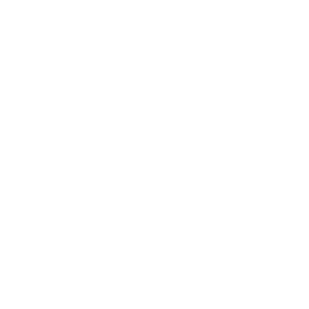

In [16]:
from matplotlib import animation

ims = []
fig = plt.figure()
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax.set_xticks([]); ax.set_yticks([])

for train_ims in progress_images:
    im_1 = plt.imshow(train_ims[4,:,:,0],cmap='gray_r',vmin=0, vmax=1, animated=True) #add first image for test
    ims.append([im_1])
    #plt.pause(0.1) 

mp4_writer =  animation.writers['ffmpeg']
writer = mp4_writer(fps=24, metadata=dict(artist='Me'), bitrate=1800)


anim = animation.ArtistAnimation(fig,ims)
anim.save("test_gif_3.mp4", writer= writer)


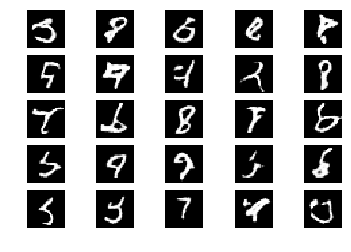

In [14]:
samples =25

fake_ims,_ = generate_from_generator(generator,samples)

for i in range(samples):
    
    plt.subplot(5,5,i+1)
    plt.axis("off")
    
    plt.imshow(fake_ims[i, : , :, 0], cmap="gray" )
plt.show()